In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [12]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [13]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]

In [14]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,year,age,draft_yr,draft_pos,attempts,yards_run,tds_run,longgain_run,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,297.437811,297.437811,2014.20398,28.144279,2008.139303,102.965174,154.144279,644.920398,4.472637,38.407960,...,0.925373,9.885572,29.313433,5.755224,2.128358,16.544279,1.751244,17.706468,18.194030,16.074627
std,161.656603,161.656603,3.13260,2.241446,3.538432,96.390683,94.378091,429.600772,4.149759,20.517376,...,1.208058,6.742540,15.788802,1.667059,1.125985,9.628493,1.515853,9.154147,9.247549,9.175478
min,5.000000,5.000000,2005.00000,22.000000,1999.000000,2.000000,6.000000,-3.000000,0.000000,5.000000,...,0.000000,0.000000,3.000000,-0.400000,0.200000,-0.300000,0.000000,1.000000,1.000000,1.000000
25%,179.000000,179.000000,2013.00000,26.000000,2006.000000,24.000000,69.000000,283.000000,1.000000,21.000000,...,0.000000,5.000000,18.000000,4.800000,1.300000,9.500000,1.000000,11.000000,11.000000,7.000000
50%,289.000000,289.000000,2014.00000,28.000000,2008.000000,65.000000,154.000000,599.000000,4.000000,36.000000,...,1.000000,9.000000,25.000000,5.800000,2.000000,15.300000,1.000000,18.000000,19.000000,17.000000
75%,441.000000,441.000000,2017.00000,29.000000,2011.000000,199.000000,227.000000,986.000000,6.000000,51.000000,...,1.000000,14.000000,36.000000,6.400000,2.900000,22.300000,3.000000,26.000000,26.000000,24.000000
max,599.000000,599.000000,2019.00000,36.000000,2015.000000,257.000000,360.000000,2097.000000,28.000000,97.000000,...,7.000000,32.000000,80.000000,11.200000,5.700000,55.400000,7.000000,32.000000,32.000000,32.000000


In [15]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [37]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  2.735906130222005
RMSE:  1.6540574748847168
MAE:  1.249584093130343
ESV:  0.518537618315993


In [39]:
esv = []
# while True: 
for i in range(5):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(18, activation="relu"))
    model.add(Dense(40, activation="relu"))
    model.add(Dense(40, activation="relu"))
    model.add(Dense(40, activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer="sgd", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=65)
    
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .625):
        winsound.Beep(1047, 750)
        winsound.Beep(1047, 750)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("\n")
print(esv)

Epoch 1/65
5/5 [==============================] - 0s 18ms/step - loss: 12.2258 - val_loss: 8.9042
Epoch 2/65
5/5 [==============================] - 0s 6ms/step - loss: 6.9000 - val_loss: 6.0500
Epoch 3/65
5/5 [==============================] - 0s 6ms/step - loss: 5.4019 - val_loss: 6.7898
Epoch 4/65
5/5 [==============================] - 0s 5ms/step - loss: 5.0150 - val_loss: 5.9367
Epoch 5/65
5/5 [==============================] - 0s 5ms/step - loss: 4.8057 - val_loss: 5.9052
Epoch 6/65
5/5 [==============================] - 0s 6ms/step - loss: 4.6456 - val_loss: 5.9902
Epoch 7/65
5/5 [==============================] - 0s 6ms/step - loss: 4.4298 - val_loss: 5.8109
Epoch 8/65
5/5 [==============================] - 0s 6ms/step - loss: 4.1670 - val_loss: 5.8342
Epoch 9/65
5/5 [==============================] - 0s 6ms/step - loss: 4.1213 - val_loss: 6.1871
Epoch 10/65
5/5 [==============================] - 0s 6ms/step - loss: 4.0501 - val_loss: 7.6927
Epoch 11/65
5/5 [====================

5/5 [==============================] - 0s 5ms/step - loss: 3.2530 - val_loss: 5.9485
Epoch 13/65
5/5 [==============================] - 0s 5ms/step - loss: 3.3422 - val_loss: 8.5410
Epoch 14/65
5/5 [==============================] - 0s 4ms/step - loss: 3.3103 - val_loss: 7.7106
Epoch 15/65
5/5 [==============================] - 0s 5ms/step - loss: 4.2183 - val_loss: 5.0884
Epoch 16/65
5/5 [==============================] - 0s 5ms/step - loss: 2.9769 - val_loss: 5.7752
Epoch 17/65
5/5 [==============================] - 0s 5ms/step - loss: 2.9543 - val_loss: 5.2085
Epoch 18/65
5/5 [==============================] - ETA: 0s - loss: 3.636 - 0s 6ms/step - loss: 3.1800 - val_loss: 5.2126
Epoch 19/65
5/5 [==============================] - 0s 5ms/step - loss: 3.1854 - val_loss: 4.9452
Epoch 20/65
5/5 [==============================] - 0s 5ms/step - loss: 3.2685 - val_loss: 15.9829
Epoch 21/65
5/5 [==============================] - 0s 6ms/step - loss: 6.2187 - val_loss: 5.2595
Epoch 22/65
5/5 [

5/5 [==============================] - 0s 5ms/step - loss: 3.2367 - val_loss: 5.0840
Epoch 24/65
5/5 [==============================] - 0s 5ms/step - loss: 2.9681 - val_loss: 8.0563
Epoch 25/65
5/5 [==============================] - 0s 5ms/step - loss: 3.1014 - val_loss: 4.9676
Epoch 26/65
5/5 [==============================] - 0s 5ms/step - loss: 2.7072 - val_loss: 4.9642
Epoch 27/65
5/5 [==============================] - 0s 5ms/step - loss: 2.8351 - val_loss: 5.1786
Epoch 28/65
5/5 [==============================] - 0s 5ms/step - loss: 2.8197 - val_loss: 5.6215
Epoch 29/65
5/5 [==============================] - 0s 5ms/step - loss: 3.1671 - val_loss: 4.8875
Epoch 30/65
5/5 [==============================] - ETA: 0s - loss: 2.939 - 0s 5ms/step - loss: 3.1348 - val_loss: 5.3893
Epoch 31/65
5/5 [==============================] - 0s 5ms/step - loss: 2.8241 - val_loss: 4.7935
Epoch 32/65
5/5 [==============================] - 0s 5ms/step - loss: 2.5660 - val_loss: 4.8548
Epoch 33/65
5/5 [=

5/5 [==============================] - 0s 5ms/step - loss: 2.8050 - val_loss: 5.1906
Epoch 35/65
5/5 [==============================] - 0s 5ms/step - loss: 2.4610 - val_loss: 5.1156
Epoch 36/65
5/5 [==============================] - 0s 5ms/step - loss: 2.7750 - val_loss: 5.0151
Epoch 37/65
5/5 [==============================] - 0s 5ms/step - loss: 2.6683 - val_loss: 4.9338
Epoch 38/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3557 - val_loss: 5.5634
Epoch 39/65
5/5 [==============================] - 0s 5ms/step - loss: 2.5380 - val_loss: 6.0426
Epoch 40/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3793 - val_loss: 5.2390
Epoch 41/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3451 - val_loss: 5.4244
Epoch 42/65
5/5 [==============================] - 0s 5ms/step - loss: 3.4304 - val_loss: 5.1217
Epoch 43/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3513 - val_loss: 5.2258
Epoch 44/65
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 2.0999 - val_loss: 5.9893
Epoch 46/65
5/5 [==============================] - 0s 6ms/step - loss: 2.3276 - val_loss: 4.8655
Epoch 47/65
5/5 [==============================] - 0s 6ms/step - loss: 2.7183 - val_loss: 5.7308
Epoch 48/65
5/5 [==============================] - 0s 5ms/step - loss: 2.6054 - val_loss: 7.6046
Epoch 49/65
5/5 [==============================] - 0s 5ms/step - loss: 2.4349 - val_loss: 7.9989
Epoch 50/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3512 - val_loss: 5.7368
Epoch 51/65
5/5 [==============================] - 0s 5ms/step - loss: 2.1716 - val_loss: 5.1100
Epoch 52/65
5/5 [==============================] - 0s 5ms/step - loss: 2.3606 - val_loss: 6.6186
Epoch 53/65
5/5 [==============================] - 0s 5ms/step - loss: 2.2036 - val_loss: 6.5193
Epoch 54/65
5/5 [==============================] - 0s 5ms/step - loss: 3.7330 - val_loss: 4.8957
Epoch 55/65
5/5 [=========================

In [21]:
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  4.3297266305924715
RMSE:  2.080799517154998
MAE:  1.7135126789280875
ESV:  0.18797883736699417


In [22]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_71 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_72 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_73 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 7         
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'real')

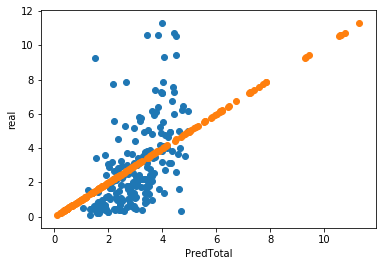

In [23]:
X_scl = scaler.fit_transform(X)
predTotal = model.predict(X_scl)
plt.scatter(predTotal,y)
plt.scatter(y,y)
plt.xlabel("PredTotal")
plt.ylabel('real')

In [11]:
bigpred = [i for i in predTotal if i >= 5] 
bigpred

NameError: name 'predTotal' is not defined

In [ ]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    print(model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

In [ ]:
#model.save('./savedmodels/April27-norookie')

In [31]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  4.500784850833322
RMSE:  2.1215053266096984
MAE:  1.5205602826493432
ESV:  -0.46056120636169307


In [15]:
from sklearn.linear_model import LinearRegression

MAE: 0.9596240325094597
MSE: 1.525682738916666
RMSE: 1.235185305497384
ESV:  0.28225617919754986


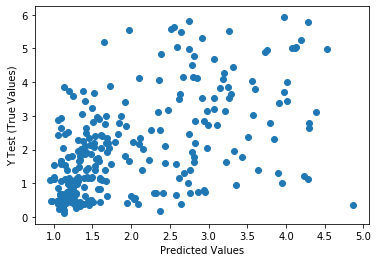

In [21]:
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)
plt.scatter(predictions,y)
plt.ylabel("Y Test (True Values)")
plt.xlabel("Predicted Values")
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

print("ESV: ", explained_variance_score(y, predictions))

In [ ]:
sns.pairplot(df,x_vars=['age','draft_pos','attempts','yards_run','tds_run','longgain_run','g','gs','tgt','rec','yards_rec','tds_rec','firstdowns','longgain_rec','fumbles','team_adjusted_line_yards','team_running_back_yards','team_stuffed_rate'],y_vars=['Percenthit (%)'])